In [1]:
# importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Reading the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Finding the shape of the data
df.shape

(25, 2)

In [4]:
# Detecting Nan Values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Inference : 
* There are 50 observations in the dataset.
 
### Hours
* The average study hours is with a Standard Deviation of 2.52.
* Maximum hours studied by the students are 9.2 and minimum hours studied by the students are 1.1 

### Scores 
* The average scores scored by the student is 51.48 with a standard deviation of 25.28.
* The maximum scores scored by the student is 95 and minimum scores scored by the student is 95

# Univariate Analysis

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


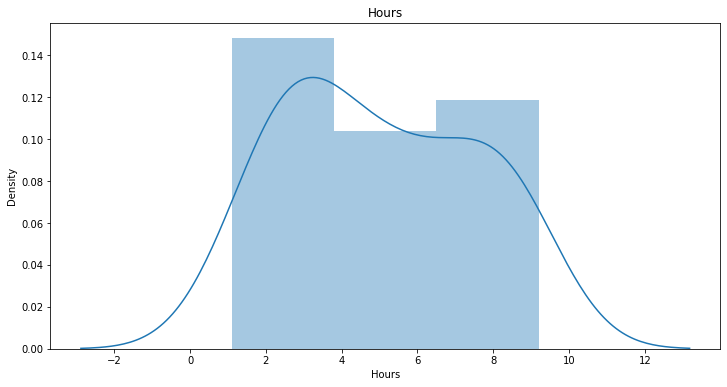

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(df['Hours'])
plt.title('Hours',size=12)
plt.show()

# Inference : 
* Distribution is not normal

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


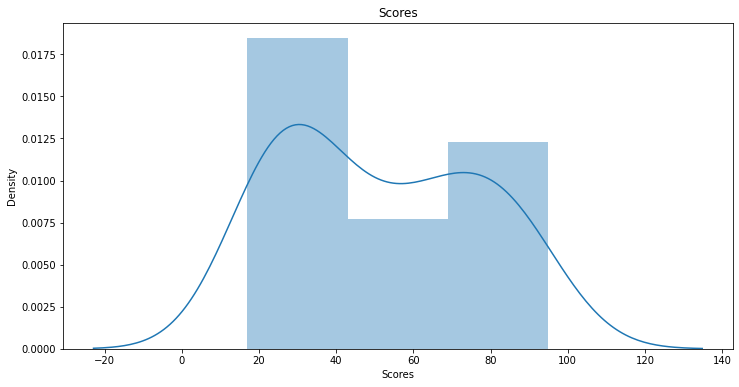

In [7]:
plt.figure(figsize=(12,6))
sns.distplot(df['Scores'])
plt.title('Scores',size=12)
plt.show()

# Bivariate Analysis

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


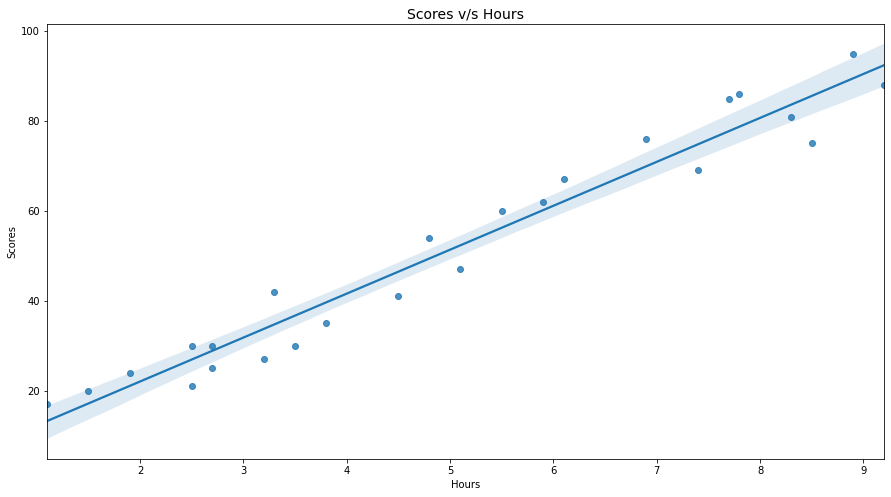

In [8]:
plt.figure(figsize=(15,8))
sns.regplot(df['Hours'],df['Scores'])
plt.title('Scores v/s Hours',size = 14)
plt.show()

# Inference : 
* From the figure above we find out that there is a strong positive correlation between Hours and scores which can be proved below.
* Strong positive correaltion shows that marks scored will increase if the student will study for more hours

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\matrix.py:255: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


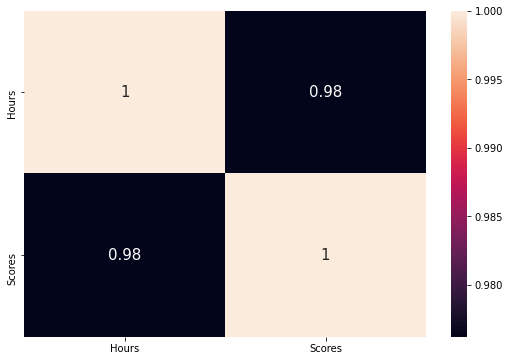

In [9]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,annot_kws = {'Size' : 15})
plt.show()

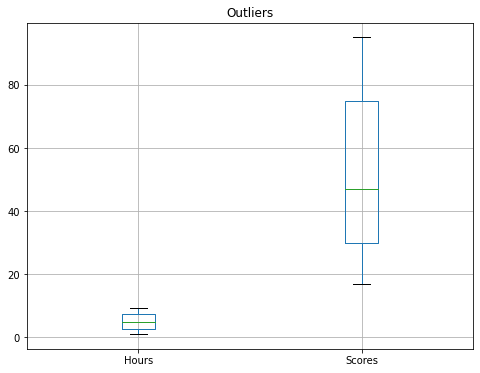

In [10]:
# Detecting Outiers in the data
plt.figure(figsize=(8,6))
df.boxplot()
plt.title('Outliers',size = 12)
plt.show()

# Inference : 
 There are no outliers in the data 

In [11]:
inp = df.drop(['Scores'],axis=1)
out = df['Scores']

In [12]:
# Building OLS model

model = sm.OLS(out,sm.add_constant(inp)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           9.13e-17
Time:                        18:23:32   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
inp

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [14]:
# Splitting the data into Train, Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


xtrain,xtest, ytrain, ytest = train_test_split(inp,out,test_size=0.2,random_state = 0)

print('The shape of Xtrain is : ', xtrain.shape ,'and the shape of Xtest is : ', xtest.shape )
print('The shape of Ytrain is : ', ytrain.shape ,'and the shape of Ytest is : ', ytest.shape )

The shape of Xtrain is :  (20, 1) and the shape of Xtest is :  (5, 1)
The shape of Ytrain is :  (20,) and the shape of Ytest is :  (5,)


# 1. Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print('Training Accuracy is :', lr.score(xtrain,ytrain))
print('Testing Accuracy is :', lr.score(xtest,ytest))

Training Accuracy is : 0.9515510725211553
Testing Accuracy is : 0.9454906892105356


In [22]:
lr_pred = lr.predict(xtest)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

lr_accuracy = round(r2_score(ytest,lr_pred)*100,2)
lr_rmse = round(np.sqrt(mean_squared_error(ytest,lr_pred)),2)

print('Accuracy is :', lr_accuracy)
print('RMSE is :', lr_rmse)

Accuracy is : 94.55
RMSE is : 4.65


In [30]:
model = pd.DataFrame()
model = model.append({'Model' : 'Linear Regression ', 'R2 Score' : lr_accuracy , 'RMSE' : lr_rmse},ignore_index = True)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2. Decision Tree Regressor

In [31]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

print('Training Score is :', dt.score(xtrain,ytrain))
print('Testing Score is :', dt.score(xtest,ytest))

Training Score is : 0.9990199883182608
Testing Score is : 0.6991722188572582


In [32]:
dt_pred = dt.predict(xtest)

dt_accuracy = round(r2_score(ytest,dt_pred)*100,2)
dt_rmse = round(np.sqrt(mean_squared_error(ytest,dt_pred)),2)


In [33]:
print('Accuracy is :', dt_accuracy)
print('RMSE is :', dt_rmse)

Accuracy is : 69.92
RMSE is : 10.92


# 3. Random Forest Regressor

In [34]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

print('Training Score is :', rf.score(xtrain,ytrain))
print('Testing Score is :', rf.score(xtest,ytest))

Training Score is : 0.9899863947411587
Testing Score is : 0.7983153871019099


In [35]:
rf_pred = rf.predict(xtest)

rf_accuracy = round(r2_score(ytest,rf_pred)*100,2)
rf_rmse = round(np.sqrt(mean_squared_error(ytest,rf_pred)),2)

print('Accuracy is :', rf_accuracy)
print('RMSE is :', rf_rmse)

Accuracy is : 79.83
RMSE is : 8.94


In [36]:
model = model.append({'Model' : 'Decision Tree Regressor ', 'R2 Score' : dt_accuracy , 'RMSE' : dt_rmse},ignore_index = True)
model = model.append({'Model' : 'Random Forest Regressor ', 'R2 Score' : rf_accuracy , 'RMSE' : rf_rmse},ignore_index = True)

In [37]:
model.sort_values(by='R2 Score',ascending= False)

,Model,R2 Score,RMSE
0,Linear Regression,94.55,4.65
2,Random Forest Regressor,79.83,8.94
1,Decision Tree Regressor,69.92,10.92


# Inference :

* After comparing all the models Linear Regression has the best Accuracy Score and Least RMSE values which means it can be used for prediction.